## Network Science Coursework 1

Spring 2025

Due: February 10th, 1:00pm GMT

Please provide your CID number

CID: 02380481

In [2]:
# Do not modify this cell or import any other modules without explicit permission.
# You should run this cell before running the code below.
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import scipy.sparse as sp

# Overview

In this assignment, we will study a **weighted, undirected network** representing co-authorships between scientists who posted preprints on the _Astrophysics E-Print Archive_ between January 1, 1995, and December 31, 1999 (*M. Newman, 2001*).

- Each node represents an author.  
- A **weighted edge** between two nodes represents the **number of papers** they co-authored together.  

You have been provided with a file (`data.gml`) containing the network data. Ensure that this file is stored in the **same directory** as your `.ipynb` notebook.  

The cell below loads the graph $g$ and verifies that the data is loaded correctly. The expected output is:

- **$N = 50$** (number of unique authors)
- **$L = 55$** (number of links)

In [4]:
g = nx.read_gml("data.gml")
N = g.number_of_nodes()
print(type(g))
print("N=",g.number_of_nodes())
print("L=",g.number_of_edges())

<class 'networkx.classes.graph.Graph'>
N= 50
L= 55


### Part 1: _Betweenness Centrality_ (7 points)
(a) The _betweenness centrality_ of node $i$ is defined as
$$b_i=\sum_{j\neq k\neq i}\frac{s_{i}(j,k|i)}{s(j,k)},$$
where $s(j,k)$ is the total number of shortest paths between nodes $j$ and $k$, and $s_{i}(j,k|i)$ is the number of shortest paths between nodes $j$ and $k$ that pass through $i$. 

Develop the function below **b_centrality** that inputs the graph $G$, and outputs the vector $\boldsymbol{b}$ as a NumPy array of length $N$, containing the betweeness centrality of each node in $G$, where $G$ is an unweighted, undirected, complete graph. 

You may use NetworkX shortest path functions ([documentation here](https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html)) but you **cannot** use `nx.betweenness_centrality`.

Below the function, provide a 2-3 sentence explanation of the main
steps you have taken to make your code eﬀicient.

(b) Once your function is implemented test your code using `nx.betweenness_centrality`. Read the documentation carefully ([link here](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html)), since `nx.betweenness_centrality(G)` normalises the betweenness centrality by default, and it returns a **dictionary**, while your function should return an **array**.

To verify correctness, a small graph $G$ is provided below.

In [6]:
#Question 1

#Part A

def b_centrality(G):
    """
    Compute the betweenness centrality for a N-node graph G

    Input:
    G: The graph G
    
    Output:
    b: N-element numpy array containing the centrality vector

    Please do not modify the function input or the return statement below
    """
    N = G.number_of_nodes()
    #Create array of zeros to update values into
    b = np.zeros(N)

    #Loop over all j and all k>j and assuming nodes are indexed 1-N
    for j in range(1, N+1):  
        for k in range(j+1, N+1):
            #Creating a list of the shortest paths
            paths = [p for p in nx.all_shortest_paths(G,j,k)]
            s_jk = len(paths)

            #Avoid division by zero error
            if s_jk != 0:
                for p in paths:
                    #For intermedairy node in the shortest path, update its corresponding entry in the array
                    for i in p[1:-1]:
                        b[i-1] += 1/s_jk

    return b


*Add brief discussion here on the steps taken to make your code efficient*

Answer: 

1) When calculating the number of shortest path, we consider only a total of (N-1)N/2 combinations of j and k since we index by k>j, this avoids uncessary calculations since s(j,k) = s(k,j). Otherwise, we would have N^2 calculations here.

2) I make use of NetworkX's all_shortest_paths since it is likely already highly optimised compared to any of my attemps to create an identical function.

3) Since I only loop over j and k and then check all the i within the paths, there are only 2 nested loops so O(N^2) for this part of the fucntion. This is more efficient than using 3 nested loops for the iteration (first i, then j, then k>j) which has a complexity of O(N^3). So my fucntion is more efficient, especially as the size of the network increases. 

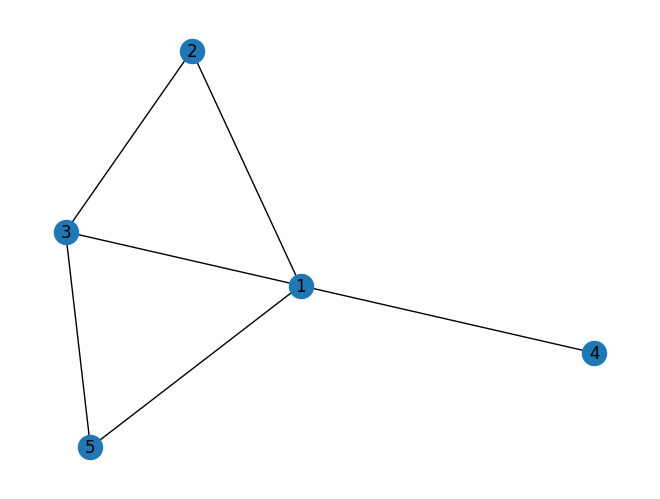

In [8]:
#Run this cell to compile a test graph G

G = nx.Graph()
G.add_edge(1, 5)
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(3, 5)
G.add_edge(3, 5)
G.add_edge(1, 4)
G.add_edge(2, 3)

plt.figure()
nx.draw(G,with_labels=True)
plt.show()


In [9]:
#Question 1

#Part B

#Converting NetworkX's dictionary into an np.array sorted by its keys (sorting by increasing node index) 
nx_betweenness_dict = nx.betweenness_centrality(G, normalized = False)
nx_betweenness_array = np.array([nx_betweenness_dict[i] for i in sorted(nx_betweenness_dict.keys())])

print(f'My b_centrality: {b_centrality(G)}')
print(f'NetworkX b_centrality: {nx_betweenness_array}')

#The outputs are equal
print(b_centrality(G) == nx_betweenness_array)

My b_centrality: [3.5 0.  0.5 0.  0. ]
NetworkX b_centrality: [3.5 0.  0.5 0.  0. ]
[ True  True  True  True  True]


### Part 2: Centrality of the **data set** provided (graph $g$) (7 marks)

(a) Betweenness centrality calculation

Compute the *betweenness centrality* for both:
1. The **unweighted** graph $g$.
2. The **weighted** graph $g$.

Use the [`nx.betweenness_centrality`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html) function provided by NetworkX, not the code you have developed. 

(b) Katz centrality calculation

Use the [`nx.katz_centrality`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.katz_centrality.html) function to compute the *Katz centrality* for the **weighted** graph $g$.

- **Important**: You must find a sensible value of $\alpha$ to use in the calculation.

(c)  Comparing centralities

Examine your results for the centralities, by comparing (1) the unweighted betweenness centrality, (2) the weighted betweenness centrality and (3) the weighted Katz centrality. Add code to the cell below to support your comparison. You may find it useful to normalise the centralities to be between $0$ and $1$ by using the function **normalise** provided below. Provide a brief non-technical description of how much agreement there is between (1) and (2) and between (2) and (3), and discuss why some nodes may have higher or lower scores with different measures. Your code may generate 1-3 figures, or do something else that is comparably useful.

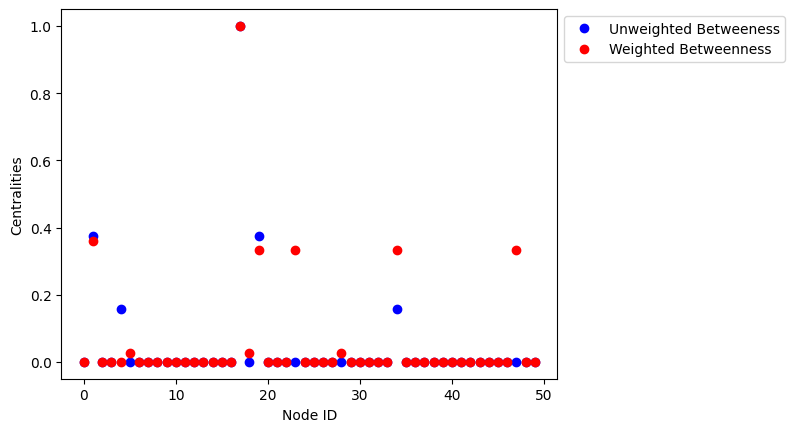

In [11]:
# Normalize function to scale values between 0 and 1
def normalise(values):
    min_val = np.min(values)
    max_val = np.max(values)
    return (values - min_val) / (max_val - min_val) if max_val > min_val else np.zeros_like(values)


#Question 2

#Part A

#I am not normalising the betweeness or Katz centralities just yet, as I do not want to normalise by the number of paths (for betweeness)
#and the norm of the vector (for Katz), which the NetworkX functions would otherwise do by default. 
#Instead, I will use the provided normalise function which subtracts the minimal value and then
#divides by the range, to make the centralities easier to compare. (see plots) 

unweighted_between = nx.betweenness_centrality(g, weight = None, normalized = False)
weighted_between = nx.betweenness_centrality(g, weight = "weight", normalized = False)

#Finding Spectral Radius
gA = nx.adjacency_matrix(g)
#Finding the largest eigenvalue by magnitude (and taking the real part as sp outputs a complex number of the form a + 0j
lamb= (sp.linalg.eigs(gA, k=1, which = 'LM')[0]).real

#Alpha = 1/(2*lamb) < 1/lamb
my_alpha = (1/(2*lamb))

katz_centrality  = nx.katz_centrality(g, alpha = my_alpha, weight = "weight", normalized = False)

#Normalise before plots
norm_unweighted_vals = normalise(list(unweighted_between.values()))
norm_weighted_vals = normalise(list(weighted_between.values()))
norm_katz_vals = normalise(list(katz_centrality.values()))

#The node IDs
x_vals = range(0, N)

plt.ylabel('Centralities')
plt.xlabel('Node ID')

plt.plot(x_vals, norm_unweighted_vals, 'bo', label = 'Unweighted Betweeness')
plt.plot(x_vals, norm_weighted_vals, 'ro', label = 'Weighted Betweenness')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#Here I have used https://matplotlib.org/stable/api/legend_api.html to anchor the legend box to make the visual clearer

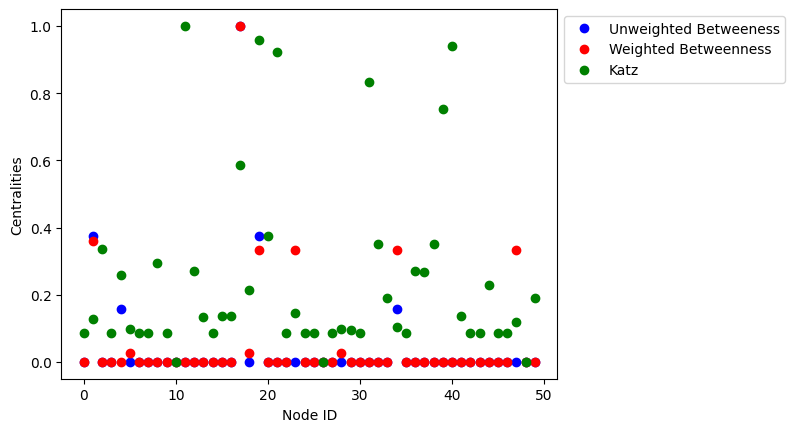

In [12]:
plt.ylabel('Centralities')
plt.xlabel('Node ID')

plt.plot(x_vals, norm_unweighted_vals, 'bo', label = 'Unweighted Betweeness')
plt.plot(x_vals, norm_weighted_vals, 'ro', label = 'Weighted Betweenness')
plt.plot(x_vals, norm_katz_vals, 'go', label = 'Katz')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

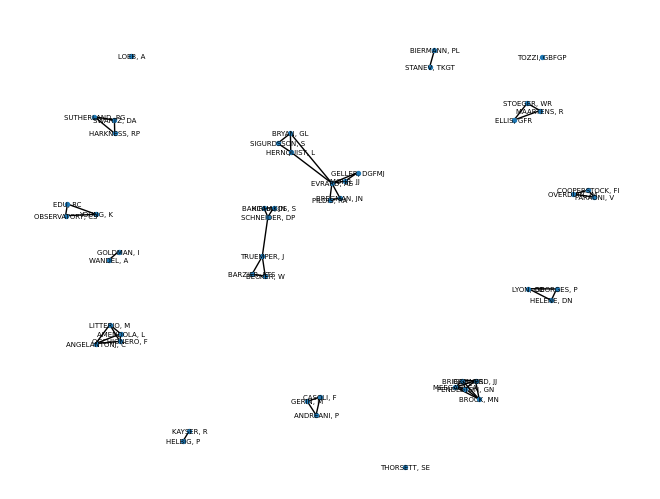

In [13]:
#Visualisation of the graph that we are working with
nx.draw(g, node_size=8, with_labels=True, font_size=5)
plt.show()

#May need to regenerate for a clearer identification of EVRARD, AE and HERNQUIST, L (see later)

*Add brief discussion here*

1) General Observation:

   For the majority of the nodes (especially those with relatively low centralities), all three of the weighted betweenness, unweighted betweeness and Katz centrality measures are in agreement. As a result, a node with high centrality for either of these meaures gives a good and broad sense of its "importancy" in the publication network. 


2) Comparing Unweighted and Weighted Betweenness:

   For the majority of the nodes, the weighted betweenness centrality is greater than the unweighted, indicating a higher importance to that node where they have made a greater number of publications with their neighbouring research fellows. However, this is not true for all nodes, for example, for "HERNQUIST, L" (node ID 4) we observe the opposite. This is likely to indicate that they have publihsed very few preprint with their peers and hence, the unweighted betweeness overemphasises their centrality as we see that their "importance" becomes more diluted when we consider the number of shortest co-authorship paths that involve HERNQUIST (shown by the weighted centrality).  


3) Comparing Weighted Betweenness and Katz:

   For the majority of the nodes, their Katz centrality are higher than the betweenness centralities for the weighted graphs. Looking at g, this makes sense since there are many small disjoint components to the network. Within these components, nodes are very connected, hence the betweenness will likely be small since most of the shortest paths are direct and thus do not bypass any intermediary nodes. In this context, this represents researches collabrating in small groups in which they are close to all of their fellows. 

    For some nodes (e.g. "EVRARD, AE" with node ID 17) they have a relatively high betweenness centrality but a relatively average Katz centrality. This is likely because they act as an intermediary link between many of the publications (they may be the most qualified and have the most authority in their research group). Under closer inspection of the graph we see that this is indeed true, Evrard as acts a "bridge" between coauthorhsip in publications within their group.

### Part 3: Identifying hubs (6 points)
(a) The _betweenness centrality_ and _Katz centrality_ help to identify hubs. What properties would we expect hubs to exhibit when using these techniques?

(b) If a hub is identified in graph $g$ using these techniques, what does this represent physically? How does this interpretation change when considering the weighted graph versus the unweighted graph?

*Add brief discussion here*

Part A:

A hub in a network acts as a central node that bridges many nodes and forms connections between those that may have otherwise been disjoint. As a result, hubs are likely to have a relatively low Katz centrality as its neighbours are not very connected amongst eachother. However (more importantly) it is likely to have a significantly higher betweenness centrality as shortest paths between nodes are very likely to pass through the hub node, causing it to act as an intermediate.

Part B:

As mentioned in the previous question, Evrard acts as a hub since they display the qualities mentioned in part a). In this context a hub is likely to represent a the node of a very qualified researcher of their group and hence they act as bridge between publications and possibly supervise many of the preprint publications. Additonally they may be well educated in a range of Astrophysical matters so can act as an intermediary between researchers who are specialised in different areas but within the same group. For a weighted graph this betweenness centrality is likely to highlight that numerous publications have been made with this profilic researcher as there will be even more emphasis of their works in the betweeness calculation (amplifying their "importance") as opposed to the publications that they have not been involved in which will become more diluted.

### Further guidance

* You should submit both a completed ipynb file (Jupiter notebook) and a pdf version of the notebook file (generated using File --- Download as in notebook). If you cannot generate a pdf, try installing latex first, or submit an html version instead. Create a zip file containing both. 
    To submit your assignment, go to the _Assessments and Mark Schemes_ folder in the _Course Content_ on the Blackboard. Upload your PDF and ZIP file into _Coursework 1 Drop Box Spring 25_. All files should be named *coursework1_CID.ipynb*, *coursework1_CID.pdf* and *coursework1_CID.zip*,  where CID is your CID number). 
* You may use numpy, scipy, and matplotlib as needed. You may use networkx as needed **except** the beteweenness_centrality function in Part 1 (a). Please do not use any other packages without explicit permission.
* Marking will be based on the correctness of your work, the efficiency of your codes, and the degree to which your submission reflects a good understanding of the material covered up to the release of this assignment. 
* This assignment requires sensible time-management on your part. Do not spend so much time on this assignment that it interferes substantially with your other modules. If you are concerned that your approach to the assignment may require an excessive amount of time, please get in touch with the instructor. 
* Questions about the assignment should be asked in private settings. This can be a "private" question on Ed (which is distinct from "anonymous"), asking for a one-on-one meeting during office hours, or during a problem class.
* Please regularly backup your work. For example, you could keep an updated copy of your notebook on OneDrive.
* In order to assign partial credit, we need to understand what your code is doing, so please add comments to the code to help us.
* It may be helpful to initally develop your code in a Python module (outside of a function) and run it in a qtconsole (or similar Python terminal) so that you can readily access the values of the variables you are using.
* Feel free to use/modify codes that I have provided during the term.
